##  实例2:将模拟数据制作成内存对象数据集

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 在内存中生成模拟数据
def GenerateData(batchsize=100):
    train_x = np.linspace(-1,1,batchsize)                      # 生成-1到1之间的100个浮点数
    train_y = 2 * train_x + np.random.randn(*train_x.shape) * 0.3    #  y = 2 * x ,但是还加入了一些噪声
    yield train_x,train_y

In [9]:
# 定义模拟数据制作成内存对象数据集
Xinput = tf.placeholder("float",(None))
Yinput = tf.placeholder("float",(None)) 

In [14]:
# 建立会话，获取并输出数据
training_epochs = 20 
with tf.Session() as sess:
    for epoch in range(training_epochs):
        for x , y in GenerateData():
            xv,yv = sess.run([Xinput,Yinput],feed_dict={Xinput:x,Yinput:y})
            
            # 打印数据
            print(epoch,"| x.shape:",np.shape(xv),"| x[:3]:",xv[:3])
            print(epoch,"| y.shape:",np.shape(yv),"| y[:3]:",yv[:3])
            print('-'*70) 

0 | x.shape: (100,) | x[:3]: [-1.         -0.97979796 -0.959596  ]
0 | y.shape: (100,) | y[:3]: [-2.0478904 -2.3657722 -2.5368311]
----------------------------------------------------------------------
1 | x.shape: (100,) | x[:3]: [-1.         -0.97979796 -0.959596  ]
1 | y.shape: (100,) | y[:3]: [-2.3804157 -2.1333778 -2.2869306]
----------------------------------------------------------------------
2 | x.shape: (100,) | x[:3]: [-1.         -0.97979796 -0.959596  ]
2 | y.shape: (100,) | y[:3]: [-2.4110796 -1.8811418 -2.587183 ]
----------------------------------------------------------------------
3 | x.shape: (100,) | x[:3]: [-1.         -0.97979796 -0.959596  ]
3 | y.shape: (100,) | y[:3]: [-2.1813755 -1.790365  -2.041586 ]
----------------------------------------------------------------------
4 | x.shape: (100,) | x[:3]: [-1.         -0.97979796 -0.959596  ]
4 | y.shape: (100,) | y[:3]: [-1.8072706 -2.0352323 -1.8529906]
-------------------------------------------------------------

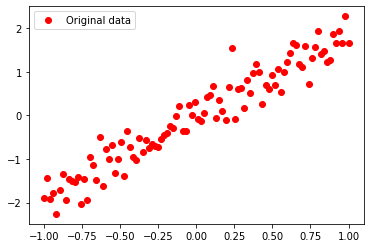

In [15]:
# 显示模拟数据点
train_data = list(GenerateData())[0]    # 获取数据
plt.plot(train_data[0],train_data[1],'ro',label='Original data')   # 生成图像
plt.legend()                            # 添加图例
plt.show()                              # 显示图像

## 创建带有迭代值并支持乱序功能的模拟数据集

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle      # 导入sklearn库

# 在内存中生成模拟数据
def GenerateData(training_epochs,batchsize=100):
    for i in range(training_epochs):
        train_X = np.linspace(-1,1,batchsize)
        train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 
        yield shuffle(train_X,train_Y),i 

In [26]:
# 定义两个占位符，用来接收参数
Xinput = tf.placeholder("float",(None))
Yinput = tf.placeholder("float",(None))

training_epochs = 20                               # 定义需要迭代的次数

with tf.Session() as sess:                         # 建立会话
    for (x,y),ii in GenerateData(training_epochs): # 用一个循环来遍历
        xv,yv = sess.run([Xinput,Yinput],feed_dict={Xinput:x,Yinput:y})   # 通过静态图注入的方式来传入数据
        print(ii,"| x.shape:",np.shape(xv),"| x[:3]",xv[:3])            # 输出x数据
        print(ii,"| y.shape:",np.shape(yv),"| y[:3]",yv[:3])            # 输出y数据
        print("\n")  

0 | x.shape: (100,) | x[:3] [-0.83838385  0.4949495  -0.43434343]
0 | y.shape: (100,) | y[:3] [-1.6000564   0.59320647 -1.2382637 ]


1 | x.shape: (100,) | x[:3] [-0.7373737   0.93939394 -0.959596  ]
1 | y.shape: (100,) | y[:3] [-1.4902476  2.0215268 -2.244261 ]


2 | x.shape: (100,) | x[:3] [-0.05050505  0.03030303 -0.7979798 ]
2 | y.shape: (100,) | y[:3] [ 0.04084384 -0.09231765 -2.0866659 ]


3 | x.shape: (100,) | x[:3] [-0.23232323  0.97979796 -0.05050505]
3 | y.shape: (100,) | y[:3] [-0.2053234   2.3161254   0.65955126]


4 | x.shape: (100,) | x[:3] [-0.35353535  0.41414142  0.6363636 ]
4 | y.shape: (100,) | y[:3] [-0.7340241  0.9536547  0.863799 ]


5 | x.shape: (100,) | x[:3] [-0.43434343  0.65656567 -0.65656567]
5 | y.shape: (100,) | y[:3] [-0.9203406  1.4674218 -2.1312428]


6 | x.shape: (100,) | x[:3] [-0.37373737  0.2929293  -0.27272728]
6 | y.shape: (100,) | y[:3] [-0.825346    0.36512178 -0.9499833 ]


7 | x.shape: (100,) | x[:3] [-0.03030303 -0.45454547  0.21212122]
7 | y

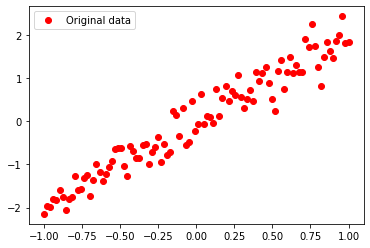

In [27]:
# 显示模拟数据点
train_data = list(GenerateData(1))[0]

plt.plot(train_data[0][0],train_data[0][1],'ro',label='Original data')
plt.legend()
plt.show() 

## 实例3:将图片制作成内存对象数据集

将图片样本数据来制作成数据集。使用TensorFlow的队列方式，充分使用CPU的多线程资源，让训练模型与数据读取以并行的方式同时运行，从而大大提升效率。

In [99]:
def load_sample(sample_dir):
    '''递归读取文件。只支持一级。返回文件名、数值标签、数值对应的标签名'''
    print ('loading sample  dataset..')
    lfilenames = []
    labelsnames = []
    for (dirpath, dirnames, filenames,) in os.walk(sample_dir):#递归遍历文件夹
        for filename in filenames:                            #遍历所有文件名
            #print(dirnames)
            filename_path = os.sep.join([dirpath, filename])
            lfilenames.append(filename_path)               #添加文件名
            labelsnames.append( dirpath.split('/')[-1] )   #添加文件名对应的标签

    lab= list(sorted(set(labelsnames)))  #生成标签名称列表
    labdict=dict( zip( lab  ,list(range(len(lab)))  )) #生成字典

    labels = [labdict[i] for i in labelsnames]
    return shuffle(np.asarray( lfilenames),np.asarray( labels)),np.asarray(lab)


data_dir = 'mnist_digits_images'   
(image,label),labelsnames = load_sample(data_dir)   #载入文件名称与标签
print(len(image)-1,image[:2],len(label)-1,label[:2])#输出load_sample返回的数据结果
print('*'*100) 
print(labelsnames[ label[:2] ],labelsnames[:-1])  #输出load_sample返回的标签字符串

loading sample  dataset..
8000 ['mnist_digits_images/6/492.bmp' 'mnist_digits_images/5/65.bmp'] 8000 [6 5]
****************************************************************************************************
['6' '5'] ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [96]:
def get_batches(image,label,resize_w,resize_h,channels,batch_size):
    
    queue = tf.train.slice_input_producer([image,label])
    label = queue[1]
    
    image_c = tf.read_file(queue[0])
    
    image = tf.image.decode_bmp(image_c,channels)
    
    image = tf.image.resize_image_with_crop_or_pad(image,resize_w,resize_h)
    
    # 将图片进行标准化处理
    image = tf.image.per_image_standardization(image)
    image_batch,label_batch = tf.train.batch([image,label],
                                            batch_size=batch_size,
                                            num_threads=64)
     
    images_batch = tf.cast(image_batch,tf.float32)
    # 修改标签的形状
    labels_batch = tf.reshape(label_batch,[batch_size])
    return images_batch,labels_batch

batch_size = 16
image_batches,label_batchs = get_batches(image,label,28,28,1,batch_size)

In [97]:
def showresult(subplot,title,thisimg):
    p = plt.subplot(subplot)
    p.axis('off')
    # p.imshow(np.asarray(thisimg[0,dtype='uint8']))
    p.imshow(np.reshape(thisimg,(28,28)))
    p.set_title(title)
    
def showing(index,label,img,ntop):
    plt.figure(figsize=(20,10))
    plt.axis('off')
    ntop = min(ntop,9) 
    print(index)
    for i in range(ntop):
        showresult(100+10*ntop+1+i,label[i],img[i])
    plt.show()
    
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess,coord=coord)
    try:
        for step in np.arange(10):
            if coord.should_stop():
                break
                image,label = sess.run([image_batches,label_batchs])
                
                showimg(step,label,images,batch_size)
                print(label)
    except tf.errors.OutOfRangeError:
        print("Done!!!")
    finally:
        coord.request_stop()
    
    coord.join(threads) 

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>, indices = 3696 is not in [0, 16)
	 [[{{node input_producer_4/GatherV2_1}} = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer_4/Const_1, input_producer_4/input_producer_Dequeue, resize_image_with_crop_or_pad_4/pad_to_bounding_box/GreaterEqual/y)]]
0


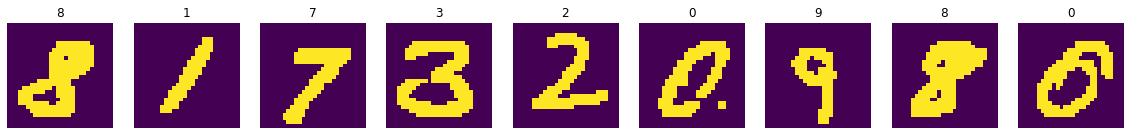

[8 1 7 3 2 0 9 8 0 0 4 6 2 9 6 7]


InvalidArgumentError: indices = 3696 is not in [0, 16)
	 [[{{node input_producer_4/GatherV2_1}} = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer_4/Const_1, input_producer_4/input_producer_Dequeue, resize_image_with_crop_or_pad_4/pad_to_bounding_box/GreaterEqual/y)]]

In [100]:
def get_batches(image,label,input_w,input_h,channels,batch_size):

    queue = tf.train.slice_input_producer([image,label])  #使用tf.train.slice_input_producer实现一个输入的队列
    label = queue[1]                                        #从输入队列里读取标签

    image_c = tf.read_file(queue[0])                        #从输入队列里读取image路径

    image = tf.image.decode_bmp(image_c,channels)           #按照路径读取图片

    image = tf.image.resize_image_with_crop_or_pad(image,input_w,input_h) #修改图片大小


    image = tf.image.per_image_standardization(image) #图像标准化处理，(x - mean) / adjusted_stddev

    image_batch,label_batch = tf.train.batch([image,label],#调用tf.train.batch函数生成批次数据
               batch_size = batch_size,
               num_threads = 64)

    images_batch = tf.cast(image_batch,tf.float32)   #将数据类型转换为float32

    labels_batch = tf.reshape(label_batch,[batch_size])#修改标签的形状shape
    return images_batch,labels_batch


batch_size = 16
image_batches,label_batches = get_batches(image,label,28,28,1,batch_size)



def showresult(subplot,title,thisimg):          #显示单个图片
    p =plt.subplot(subplot)
    p.axis('off')
    #p.imshow(np.asarray(thisimg[0], dtype='uint8'))
    p.imshow(np.reshape(thisimg, (28, 28)))
    p.set_title(title)

def showimg(index,label,img,ntop):   #显示
    plt.figure(figsize=(20,10))     #定义显示图片的宽、高
    plt.axis('off')
    ntop = min(ntop,9)
    print(index)
    for i in range (ntop):
        showresult(100+10*ntop+1+i,label[i],img[i])
    plt.show()

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)  #初始化

    coord = tf.train.Coordinator()          #开启列队
    threads = tf.train.start_queue_runners(sess = sess,coord = coord)
    try:
        for step in np.arange(10):
            if coord.should_stop():
                break
            images,label = sess.run([image_batches,label_batches]) #注入数据

            showimg(step,label,images,batch_size)       #显示图片
            print(label)                                 #打印数据

    except tf.errors.OutOfRangeError:
        print("Done!!!")
    finally:
        coord.request_stop()

    coord.join(threads)  